In [1]:
#### Create Plots based on OSCAR xml files ####


# used python version 3.10.6

In [156]:
import xml.etree.ElementTree as ET
import urllib.request
import csv
import requests
from bs4 import BeautifulSoup
from urllib.request import urlopen
import json
import re
import os
import pandas as pd
import datetime as dt

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import pandas as pd
import matplotlib.lines as mlines


In [157]:
#### Get WIGOS IDs for all stations catalogued in a country ####

country = "KEN"

# API: all stations as json
all_stations_KEN_url = "https://oscar.wmo.int/surface/rest/api/search/station?territoryName="+country


response = urlopen(all_stations_KEN_url)
data_json = json.loads(response.read())
stations = data_json["stationSearchResults"]

wigosIds = []

for station in data_json["stationSearchResults"]:
    # print(station["wigosId"])
    wigosId = str(station["wigosId"])
    wigosIds.append(wigosId)

print(wigosIds)

['0-404-300-301570787AS00074', '0-404-300-402261127AS63663', '0-404-300-271440721AS00049', '0-404-300-281480740AS00057', '0-404-300-160800395AS00001', '0-404-0-63707', '0-404-300-392191090AS63662', '0-404-0-63721', '0-404-300-040200100AS00113', '0-404-300-040200098AS00112', '0-404-300-301620807AS00073', '0-404-300-301580790AS00071', '0-404-300-402251125AS00038', '0-404-300-402281141AS00036', '0-404-300-402291146AS00033', '0-404-300-392181085AS63660', '0-404-300-361950974AS00015', '0-20000-0-63741', '0-404-300-472781389AS63747', '0-404-300-100470235AS00114', '0-404-300-372081037AS00024', '0-404-300-372000999AS00025', '0-404-300-372031019AS00022', '0-404-300-372101048AS00026', '0-20000-0-63688', '0-404-300-63686', '0-20000-0-63720', '0-404-0-63719', '0-404-300-341870932AS00005', '0-404-300-341840918A00001', '0-404-300-050210101AS00090', '0-404-0-63670', '0-20000-0-63723', '0-404-300-190950473AS00101', '0-404-300-060230111AS00047', '0-404-300-190950476AS00099', '0-404-300-070320150AS00107

In [158]:
#### append information to json file ####

def write_json(new_data, filename='stations.json'):
    with open(filename,'r+') as file:
        # First we load existing data into a dict.
        file_data = json.load(file)
        # Join new_data with file_data inside emp_details
        file_data["stations"].append(new_data)
        # Sets file's current position at offset.
        file.seek(0)
        # convert back to json.
        json.dump(file_data, file, indent = 4)

In [160]:
#### create json file #####
 
j_data = '{"stations":[]}' 

file = open("stations.json", "w")
file.write(j_data)
file.close()

#### Get station xml Files via jOAI ####

for id in wigosIds:

    # get url
    url = "https://oscar.wmo.int/oai/provider?verb=GetRecord&metadataPrefix=wmdr&identifier=%20" + id

    # get xml from url
    document = requests.get(url)
    soup= BeautifulSoup(document.content,"xml")

    #### get information to plot ####

    metadata = soup.find('metadata') #check if xml file is available on jOAI
    if metadata:

        # Name
        name = soup.find_all('name')
        # print(name[0])
        name = re.findall(r'.*?\>(.*)\<.*',str(name[0]))[0]
        # print(name)

        # Location
        location = soup.find_all('pos')
        location = re.findall(r'.*?\>(.*)\<.*',str(location))[0]
        loc = re.findall(r'-?[0-9]*\.?[0-9]*', location)
        
        lat = loc[0]
        lon = loc[2]
        if len((loc)) == 6: # check if elevation is given
            ele = loc[4]
        else:
            ele = "unknown"

        # facility type
        facilityType = soup.find('facilityType')
        facilityType = soup.find_all('facilityType')
        facilityType = re.findall(r'http://codes.wmo.int/wmdr/FacilityType/(.*)\"\s.*',str(facilityType))[0]
       
        # observed Variables
        observedProperties = soup.find_all('observedProperty')
        observedProperties_notation = re.findall(r'\d+',str(observedProperties))
            
        # Date established
        dateEstablished = soup.find_all('dateEstablished')
        if dateEstablished:
            dateEstablished = re.findall(r'\d{4}-\d{2}-\d{2}',str(dateEstablished))[0]
        else: 
            dateEstablished = "unknown"
        # print(beginPosition)

        # Date closed
        dateClosed = soup.find_all('dateClosed')
        if dateClosed:
            dateClosed = re.findall(r'\d{4}-\d{2}-\d{2}',str(dateClosed))[0]
        else: 
            dateClosed = "NA"

        # ReportingStatus
        reportingStatus = soup.find('reportingStatus')
        if reportingStatus:
            reportingStatus = soup.find_all('reportingStatus')
            reportingStatus = re.findall(r'http://codes.wmo.int/wmdr/ReportingStatus/(.*)\"\s.*',str(reportingStatus))[0]
        else:
            reportingStatus = "unknown"
        

        #### save to json File ####
        aDict = {"wigosId" : id, "name":name, "lat":lat, "lon":lon, "ele":ele, "facilityType":facilityType, "observedProperties" : observedProperties_notation, "dateEstablished" : dateEstablished, "dateClosed" : dateClosed, "reportingStatus" : reportingStatus}
        print(aDict)
        write_json(aDict)
   

{'wigosId': '0-404-300-301570787AS00074', 'name': 'AIC Churo Girls  High School', 'lat': '0.7668', 'lon': '36.4056', 'ele': '1798.0', 'facilityType': 'landFixed', 'observedProperties': ['251', '210', '216', '224', '12005', '12006'], 'dateEstablished': '2021-11-29', 'dateClosed': 'NA', 'reportingStatus': 'operational'}
{'wigosId': '0-404-300-402261127AS63663', 'name': 'ALUPE', 'lat': '0.497', 'lon': '34.1252', 'ele': 'unknown', 'facilityType': 'landFixed', 'observedProperties': ['251', '210', '210', '216', '224', '225', '230', '12005', '12006'], 'dateEstablished': '2020-09-22', 'dateClosed': 'NA', 'reportingStatus': 'operational'}
{'wigosId': '0-404-300-271440721AS00049', 'name': 'Ainabkoi KCC Plant', 'lat': '0.1601', 'lon': '35.5204', 'ele': '2635.0', 'facilityType': 'landFixed', 'observedProperties': ['251', '210', '216', '224', '12005', '12006'], 'dateEstablished': '2021-11-18', 'dateClosed': 'NA', 'reportingStatus': 'operational'}
{'wigosId': '0-404-300-281480740AS00057', 'name': 'A

In [161]:
# Load map background
m = Basemap(projection='lcc', resolution='h', 
            lat_0=0.1, lon_0=37.5,
            width=1.5E6, height=1.2E6)

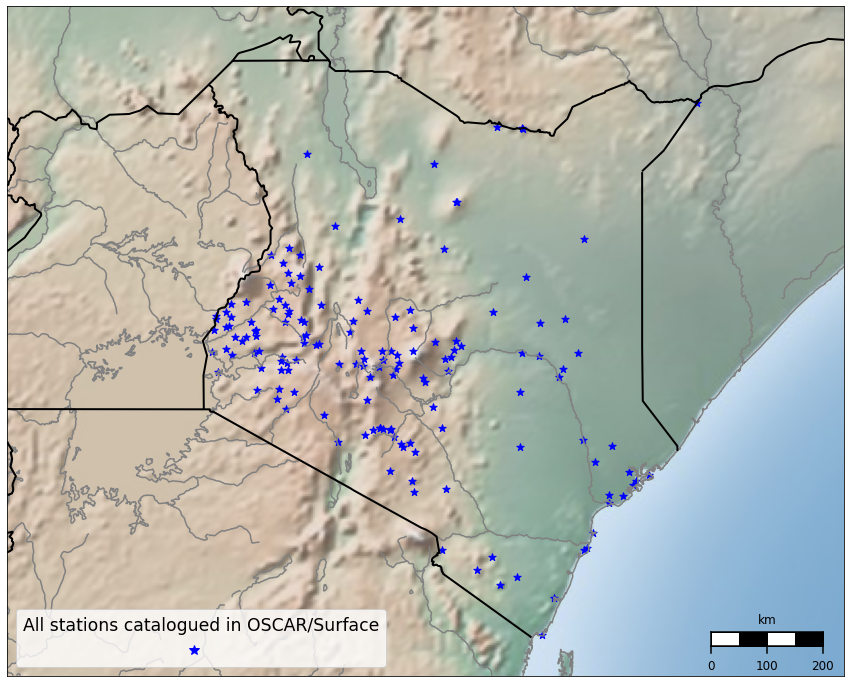

In [7]:
#### DRAW MAP of all stations ####

fig = plt.figure(figsize=(15, 15))


# map background
# m.fillcontinents(color='tan',lake_color='lightblue')
m.shadedrelief()
# m.etopo()
# m.bluemarble()
m.drawmapscale(lon=43, lat=-4.7, lon0=43,lat0=-4, length=200, barstyle="fancy", linecolor="black", fillcolor2="black", fontsize=12, fontcolor="black")
m.drawcoastlines(color='grey', linewidth=1.5)
m.drawrivers(color='grey', linewidth=1.5)
m.drawcountries(color='black', linewidth=2)
# m.drawlsmask(land_color='0.8', ocean_color='w', lsmask=None, lsmask_lons=None, lsmask_lats=None, lakes=True, resolution='l', grid=5)
# m.drawmapboundary(color='k', linewidth=1.0, fill_color=None, zorder=None, ax=None)



# f = open('data.json')
# data = json.load(f)

f = open(os.getcwd()+'/stations.json')
data = json.load(f)

for i in data['stations']:
    # print(float(i["lat"]))
    lat = float(i["lat"])
    lon = float(i["lon"])
    m.scatter(lon, lat,latlon=True,c="blue",s=60,marker="*")


# legend
stations = mlines.Line2D([], [], color='blue', marker='*', linestyle='None',markersize=10)
plt.legend(handles=[stations], loc=3, title="All stations catalogued in OSCAR/Surface", title_fontsize="xx-large", labelcolor="black", fontsize="xx-large")


# save plot
plt.savefig(os.getcwd()+"/Plots/all_stations_catalogued.jpeg", bbox_inches='tight')

In [162]:
f = open(os.getcwd()+'/stations.json')
data = json.load(f)

data["stations"][0]["observedProperties"]


['251', '210', '216', '224', '12005', '12006']

In [9]:
df = pd.DataFrame(data["stations"])
# print(df)
df[["lat", "lon", "dateEstablished", "reportingStatus", "facilityType"]]


,lat,lon,dateEstablished,reportingStatus,facilityType
0,0.7668,36.4056,2021-11-29,operational,landFixed
1,0.497,34.1252,2020-09-22,operational,landFixed
2,0.1601,35.5204,2021-11-18,operational,landFixed
3,0.9388,35.625,2021-11-29,operational,landFixed
4,-1.566213369,37.10015869,2022-09-25,unknown,landFixed
...,...,...,...,...,...
155,3.596,55.34,2009-06-23,closed,underwaterMobile
156,5.97,49.433,2009-06-23,closed,underwaterMobile
157,-3.474,54.023,2009-06-25,operational,underwaterMobile
158,-7.107,57.804,2009-06-24,closed,underwaterMobile


In [10]:
for i in df[["lat"]]:
    print(i)
print (df['reportingStatus'].unique())

lat
['operational' 'unknown' 'preOperational' 'closed' 'nonReporting']


dict_items([('operational', 'tab:blue'), ('preOperational', 'tab:purple'), ('unknown', 'tab:grey'), ('closed', 'tab:red'), ('nonReporting', 'tab:orange')])


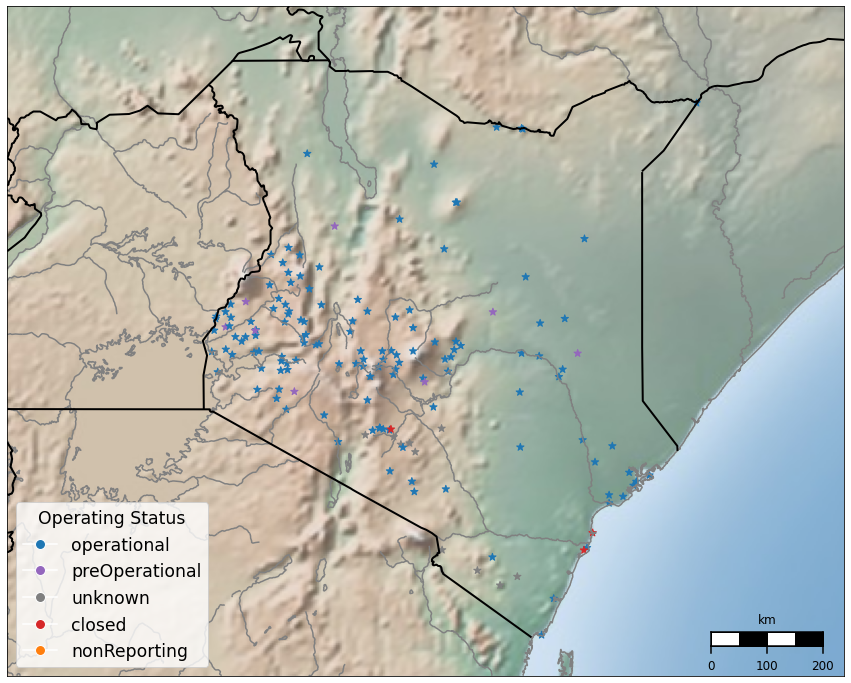

In [11]:
#### DRAW MAP of all stations ####

fig = plt.figure(figsize=(15, 15))

# map background
# m.fillcontinents(color='tan',lake_color='lightblue')
m.shadedrelief()
# m.etopo()
# m.bluemarble()
m.drawmapscale(lon=43, lat=-4.7, lon0=43,lat0=-4, length=200, barstyle="fancy", linecolor="black", fillcolor2="black", fontsize=12, fontcolor="black")
m.drawcoastlines(color='grey', linewidth=1.5)
m.drawrivers(color='grey', linewidth=1.5)
m.drawcountries(color='black', linewidth=2)
# m.drawlsmask(land_color='0.8', ocean_color='w', lsmask=None, lsmask_lons=None, lsmask_lats=None, lakes=True, resolution='l', grid=5)
# m.drawmapboundary(color='k', linewidth=1.0, fill_color=None, zorder=None, ax=None)

# f = open('data.json')
# data = json.load(f)

f = open(os.getcwd()+'/stations.json')
data = json.load(f)

# for i in data['stations']:
#     # print(float(i["lat"]))
colors = {'operational':'tab:blue', 'preOperational':'tab:purple', 'unknown':'tab:grey', 'closed':'tab:red', 'nonReporting':'tab:orange'}
print(colors.items())

lat = df["lat"]
lon = df["lon"]
m.scatter(lon, lat,latlon=True,c=df["reportingStatus"].map(colors),s=60,marker="*")


# legend
stations = [mlines.Line2D([0], [0], color="w", marker='o',markersize=10,  markerfacecolor=v, label=k) for k, v in colors.items()]
plt.legend(handles=stations, loc=3, title="Operating Status", title_fontsize="xx-large", labelcolor="black", fontsize="xx-large")


# save plot
plt.savefig(os.getcwd()+"/Plots/all_stations_reportingStatus.jpeg", bbox_inches='tight')

In [12]:
df = pd.DataFrame(data["stations"])
# print(df)
df[["lat", "lon", "dateEstablished", "reportingStatus"]]

print(min(df["dateEstablished"])) #'1908-01-01'
print(max(df["dateEstablished"])) # 2022-12-01


1908-01-01
2022-12-01


In [13]:
start_d = ["1951-01-01", "1961-01-01", "1971-01-01", "1981-01-01", "1991-01-01", "2001-01-01", "2011-01-01", "2021-01-01", "2031-01-01"]

df = pd.DataFrame(data["stations"])
df = df[(df["dateEstablished"] >= start_d[0]) & (df["dateEstablished"] < start_d[1])]

print(df)

             wigosId                                name        lat  \
17   0-20000-0-63741                    DAGORETTI CORNER  -1.301217   
25   0-404-300-63686                     ELDORET KAPSOYA    0.53333   
40   0-20000-0-63740  JOMO KENYATTA NTERNATIONAL AIRPORT  -1.334453   
41   0-20000-0-63687                            KAKAMEGA     0.2775   
152  0-20000-0-63742                              WILSON  -1.320572   

               lon      ele facilityType  \
17       36.759652  unknown    landFixed   
25        35.28333  unknown    landFixed   
40       36.917322  unknown    landFixed   
41   34.7641666667  unknown    landFixed   
152      36.815446  unknown    landFixed   

                                    observedProperties dateEstablished  \
17   [179, 251, 256, 256, 265, 210, 266, 216, 12000...      1954-01-01   
25   [179, 251, 265, 210, 266, 216, 270, 224, 224, ...      1954-01-01   
40   [179, 251, 265, 210, 266, 216, 270, 224, 230, ...      1958-03-09   
41   [179, 2

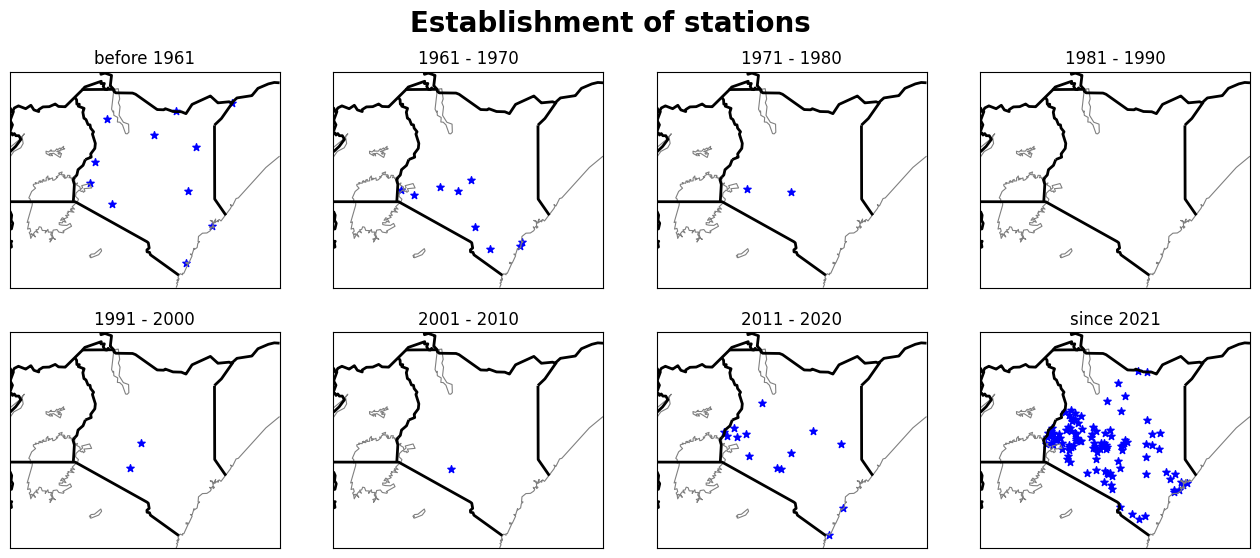

In [14]:
#### Plot: establishment of the stations (in which decade?) ####

plt.style.use('default')
fig, axes = plt.subplots(2,4, figsize=(16,6.2))

axes = axes.ravel()


start_d = ["1951-01-01", "1961-01-01", "1971-01-01", "1981-01-01", "1991-01-01", "2001-01-01", "2011-01-01", "2021-01-01", "2031-01-01"]

for i, decade in enumerate(["before 1961", "1961 - 1970", "1971 - 1980", "1981 - 1990", "1991 - 2000", "2001 - 2010", "2011 - 2020", "since 2021"]):
    
    m = Basemap(projection='lcc', resolution='l', lat_0=0.1, lon_0=37.5, width=1.5E6, height=1.2E6,  ax = axes[i]) 

    # map background
    m.drawcoastlines(color='grey', linewidth=0.8)

    m.drawcountries(color='black', linewidth=2)

    df = pd.DataFrame(data["stations"])
    if i == 0:
        df = df[(df["dateEstablished"] < start_d[i])]
    else:
        df = df[(df["dateEstablished"] >= start_d[i]) & (df["dateEstablished"] < start_d[i+1])]

    if not df.empty:
        lat = df["lat"]
        lon = df["lon"]
        m.scatter(lon, lat, latlon=True, c="blue",s=30,marker="*")

    axes[i].set_title(decade)

plt.suptitle('Establishment of stations', fontsize=20, fontweight="bold")

plt.savefig(os.getcwd()+"/Plots/Station_establishment_decade.jpeg", bbox_inches='tight')


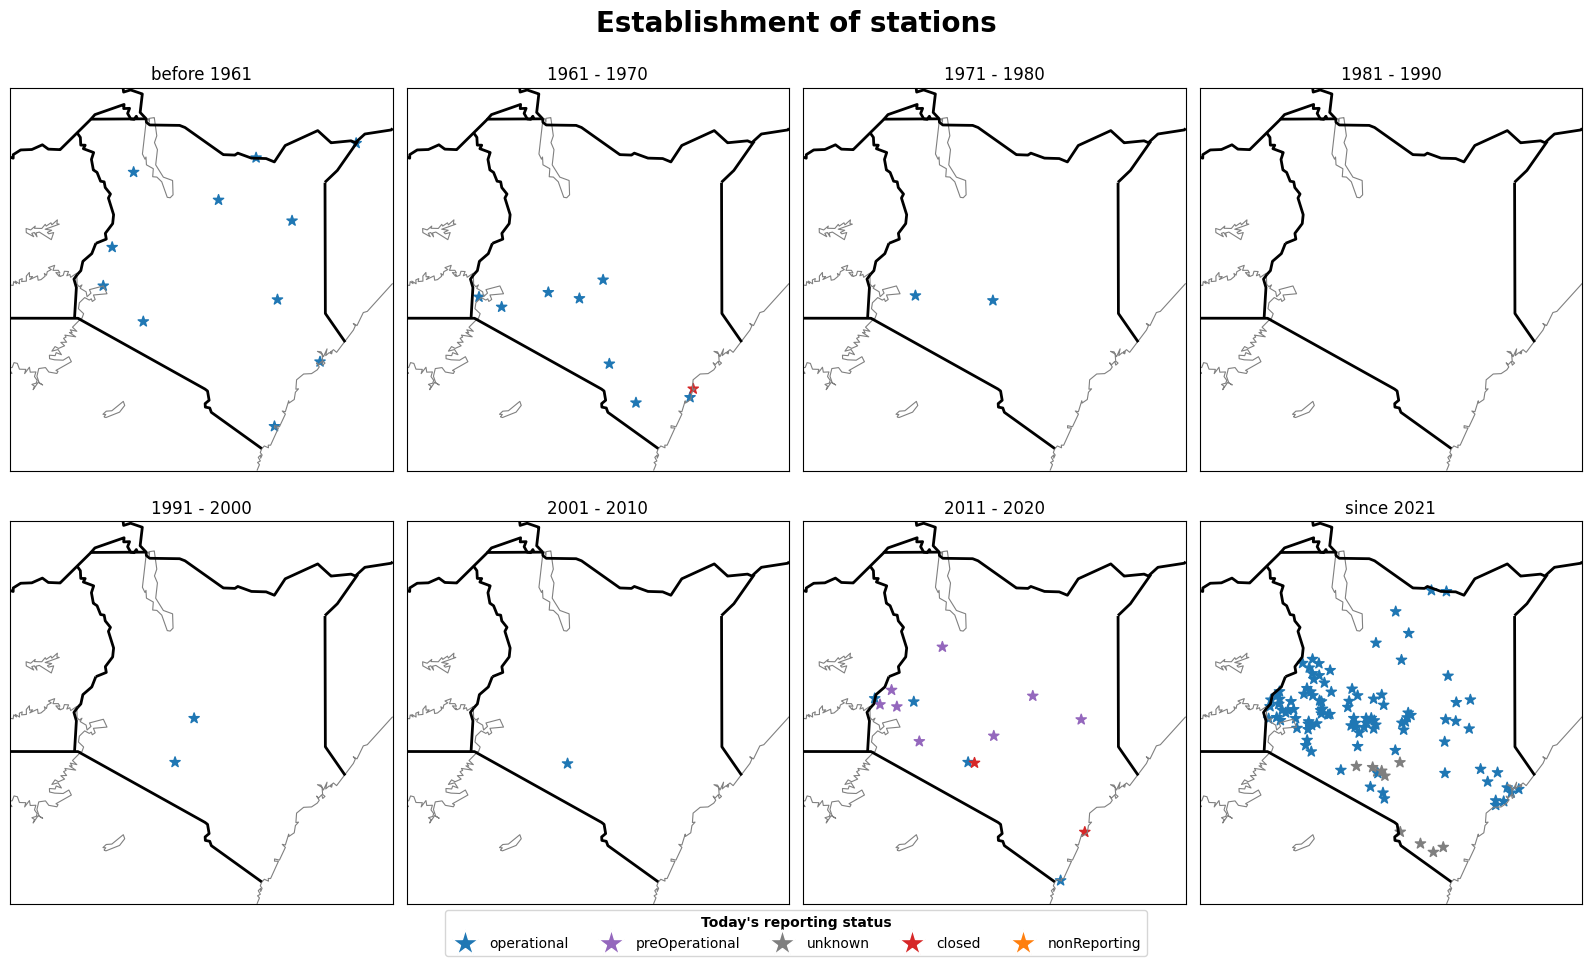

In [15]:
#### Plot: establishment of the stations (in which decade?) + today's reporting status ####

plt.style.use('default')
fig, axes = plt.subplots(2,4, figsize=(16,9.7))

axes = axes.ravel()


start_d = ["1951-01-01", "1961-01-01", "1971-01-01", "1981-01-01", "1991-01-01", "2001-01-01", "2011-01-01", "2021-01-01", "2031-01-01"]

for i, decade in enumerate(["before 1961", "1961 - 1970", "1971 - 1980", "1981 - 1990", "1991 - 2000", "2001 - 2010", "2011 - 2020", "since 2021"]):
    
    m = Basemap(projection='lcc', resolution='l', lat_0=0.1, lon_0=37.5, width=1.2E6, height=1.2E6,  ax = axes[i]) 

    # map background
    m.drawcoastlines(color='grey', linewidth=0.8)

    m.drawcountries(color='black', linewidth=2)

    df = pd.DataFrame(data["stations"])
    if i == 0:
        df = df[(df["dateEstablished"] < start_d[i])]
    else:
        df = df[(df["dateEstablished"] >= start_d[i]) & (df["dateEstablished"] < start_d[i+1])]

    if not df.empty:
        lat = df["lat"]
        lon = df["lon"]
        colors = {'operational':'tab:blue', 'preOperational':'tab:purple', 'unknown':'tab:grey', 'closed':'tab:red', 'nonReporting':'tab:orange'}
        m.scatter(lon, lat, latlon=True, c=df["reportingStatus"].map(colors),s=60,marker="*")

    axes[i].set_title(decade)

plt.suptitle('Establishment of stations', fontsize=20, fontweight="bold")

# handles, labels = axes.get_legend_handles_labels()
stations = [mlines.Line2D([0], [0], color="w", marker='*',markersize=20,  markerfacecolor=v, label=k) for k, v in colors.items()]
fig.legend(handles=stations, loc='lower center', ncol=len(stations), title="Today's reporting status", title_fontproperties={'weight':'bold'}) 
plt.tight_layout(pad=1)

plt.savefig(os.getcwd()+"/Plots/Station_establishment_decade_reporting.jpeg", bbox_inches='tight')

In [168]:
data['stations']

lat = []
lon = []
dateEstablished = []
dateClosed = []
name = []
df_animation = pd.DataFrame()

for i in data['stations']:
    # print(float(i["lat"]))
    lat.append(float(i["lat"]))
    lon.append(float(i["lon"]))
    dateEstablished.append(i["dateEstablished"])
    dateClosed.append(i["dateClosed"])
    name.append(i["name"])

df_animation["lat"] = lat
df_animation["lon"] = lon
df_animation["dateEstablished"] = dateEstablished
df_animation["dateClosed"] = dateClosed 
df_animation["name"] = name

print(lat)

# sort data frame by date
df_animation = df_animation.sort_values(by="dateEstablished")

lat = np.array(df_animation["lat"])
lon = np.array(df_animation["lon"])
df_animation

[0.7668, 0.497, 0.1601, 0.9388, -1.566213369, -0.714732, 0.3253, -0.099, -0.0975, -0.7252, 0.0393, 0.6814, 0.6921, 0.4584, 0.3401, 0.7333, -1.003, -1.301217, -1.301217, 2.3349, 0.1656, 0.7827, 0.413, 0.1882, 0.405104, 0.53333, -0.500633, -0.56, -2.3278, -1.9961, -2.0613, 0.567, -0.476425, -0.3182, -3.2658, -0.1254, -1.8506, -1.6142, -1.6871, -1.5918, -1.334453, 0.2775, 0.26667, -3.6935, -0.066, -0.34, -0.3628611, -0.4725, -0.2689, -0.682778, -0.086148, 1.002618, -0.1582, 1.4915, 1.2026, 1.0411, -0.6786, 0.4362, 1.1459, -0.3563, -3.8333, -1.4448, -0.1985, 0.4838, 0.4209, 0.5985, -0.2241, 0.0519, 0.6874, -2.22661, 3.118498, 1.95, 1.5825, -0.2604, 0.312, -2.2861111111, -3.2308333333, 3.9329326, 2.3338888889, 0.082038, -0.357, -4.04634, 3.525778, 0.387, -1.5455, -0.8529, 2.9466, -2.9900000095, -2.163, -3.595, 3.5144, 0.095, 9.0, 2.0622, -0.9646, -0.1928, 0.0246, 0.2016, -0.3752, -0.0621999986, 0.1672, -0.1542, -0.2477, -0.270841, -1.094662, -1.4948, -1.3406893, -0.442363, -2.0177, -2.4054,

,lat,lon,dateEstablished,dateClosed,name
69,-2.226610,40.848090,1908-01-01,NA,LAMU
104,-1.094662,35.863817,1913-01-01,NA,NAROK
82,3.525778,39.045280,1915-01-01,NA,MOYALE
151,1.747461,40.059111,1917-01-01,NA,WAJIR
70,3.118498,35.590338,1919-01-01,NA,LODWAR
...,...,...,...,...,...
37,-1.614200,37.133100,2022-04-13,NA,ILRI Kapiti
4,-1.566213,37.100159,2022-09-25,NA,Ausquest Farm
59,-0.356300,37.014200,2022-10-01,NA,Karundas chief’s camp
159,-6.403000,58.243000,2022-11-09,NA,1901049


In [194]:
year= 1967


df = df_animation[(pd.DatetimeIndex(df_animation["dateEstablished"]).year == year)]

for i in range(0,len(df["dateClosed"])):
    lat = []
    lon = []
    if not df.iloc[i]["dateClosed"] == "NA":
        print(i, df.iloc[i]["dateClosed"])
        lat.append(df.iloc[i]["lat"])
        lon.append(df.iloc[i]["lon"])
        

# df["dateClosed"]

# if not df["dateClosed"] == "NA":
#     print("yes")

1 1967-03-01
[-2.9900000095] [40.1899986267]


In [102]:
# Load map background
m = Basemap(projection='lcc', resolution='h', 
            lat_0=0.1, lon_0=37.5,
            width=1.5E6, height=1.2E6)

/home/sdanioth/.local/lib/python3.10/site-packages/pyproj/transformer.py:812: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return self._transformer._transform_point(


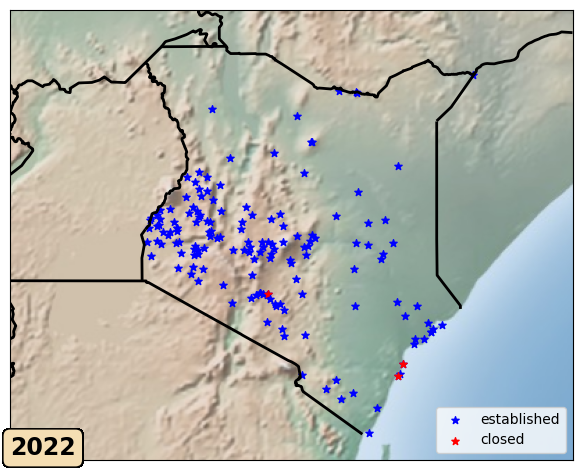

In [200]:
#### Animation ####
import matplotlib.pyplot as plt
import numpy as np
from IPython import display 
import matplotlib.animation as animation

#for legend
def legend_without_duplicate_labels(figure):
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    figure.legend(by_label.values(), by_label.keys(), loc='lower right')

plt.style.use('default')

fig = plt.figure()

m.shadedrelief()
# m.drawmapscale(lon=43, lat=-4.7, lon0=43,lat0=-4, length=200, barstyle="fancy", linecolor="black", fillcolor2="black", fontsize=12, fontcolor="black")
# m.drawcoastlines(color='grey', linewidth=1.5)
# m.drawrivers(color='grey', linewidth=1.5)
m.drawcountries(color='black', linewidth=2)

# x,y = m(lon[0], lat[0])
point = m.plot([], [], c="blue", marker="*")[0]

props = dict(boxstyle='round', facecolor='wheat', alpha=1)
def animate(year):
    df = df_animation[(pd.DatetimeIndex(df_animation["dateEstablished"]).year == year)]
    m.scatter(df["lon"], df["lat"], latlon=True, c="blue",s=30,marker="*", label = "established")

    # station closed:
    for i in range(0,len(df["dateClosed"])):
        if not df.iloc[i]["dateClosed"] == "NA":
            m.scatter(df.iloc[i]["lon"], df.iloc[i]["lat"], latlon=True, c="red",s=30,marker="*", label = "closed")

    # legend & year        
    legend_without_duplicate_labels(plt)
    plt.text(0.1, 0.1, year, color='black', size=17, weight=800, bbox=props,  horizontalalignment='left', verticalalignment='bottom')
    return m,


ani = animation.FuncAnimation(fig, animate, frames=range(1908,2023), interval=10)


# To save the animation using Pillow as a gif
plt.tight_layout()
writer = animation.PillowWriter(fps=5, bitrate=1800)
ani.save('station_establishment_Kenya.gif', writer=writer)

plt.show()

/home/sdanioth/.local/lib/python3.10/site-packages/pyproj/transformer.py:812: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return self._transformer._transform_point(


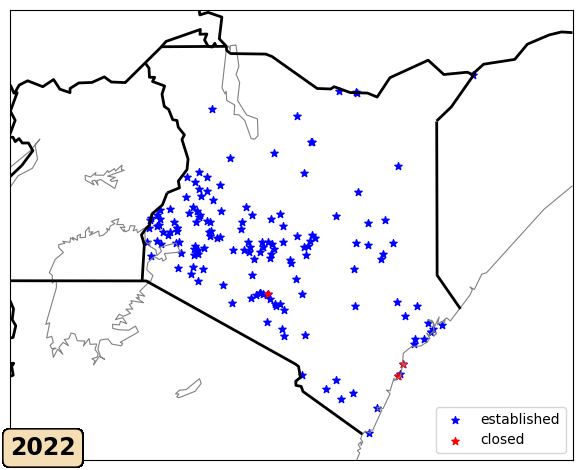

In [201]:
#### Animation ####
import matplotlib.pyplot as plt
import numpy as np
from IPython import display 
import matplotlib.animation as animation

#for legend
def legend_without_duplicate_labels(figure):
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    figure.legend(by_label.values(), by_label.keys(), loc='lower right')

plt.style.use('default')

fig = plt.figure()


m = Basemap(projection='lcc', resolution='l', lat_0=0.1, lon_0=37.5, width=1.5E6, height=1.2E6) 
# map background
m.drawcoastlines(color='grey', linewidth=0.8)
m.drawcountries(color='black', linewidth=2)

# x,y = m(lon[0], lat[0])
point = m.plot([], [], c="blue", marker="*")[0]

props = dict(boxstyle='round', facecolor='wheat', alpha=1)
def animate(year):
    df = df_animation[(pd.DatetimeIndex(df_animation["dateEstablished"]).year == year)]
    m.scatter(df["lon"], df["lat"], latlon=True, c="blue",s=30,marker="*", label = "established")

    # station closed:
    for i in range(0,len(df["dateClosed"])):
        if not df.iloc[i]["dateClosed"] == "NA":
            m.scatter(df.iloc[i]["lon"], df.iloc[i]["lat"], latlon=True, c="red",s=30,marker="*", label = "closed")

    # legend & year        
    legend_without_duplicate_labels(plt)
    plt.text(0.1, 0.1, year, color='black', size=17, weight=800, bbox=props,  horizontalalignment='left', verticalalignment='bottom')
    return m,


ani = animation.FuncAnimation(fig, animate, frames=range(1908,2023), interval=10)


# To save the animation using Pillow as a gif
plt.tight_layout()
writer = animation.PillowWriter(fps=5, bitrate=1800)
ani.save('station_establishment_Kenya_white.gif', writer=writer)

plt.show()

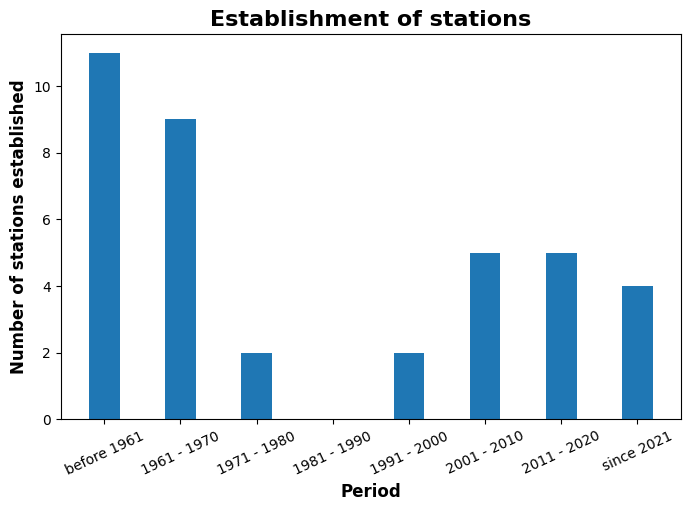

In [47]:
#### Barplot Plot: establishment of the stations (in which decade?) + today's reporting status ####

stations_n = []
start_d = ["1951-01-01", "1961-01-01", "1971-01-01", "1981-01-01", "1991-01-01", "2001-01-01", "2011-01-01", "2021-01-01", "2031-01-01"]

for i, decade in enumerate(["before 1961", "1961 - 1970", "1971 - 1980", "1981 - 1990", "1991 - 2000", "2001 - 2010", "2011 - 2020", "since 2021"]):

    df = pd.DataFrame(data["stations"])
    # print(df)

    if i == 0:
        df = df[(df["dateEstablished"] < start_d[i])]
        stations_n.append(len(df))
    else:
        df = df[(df["dateEstablished"] >= start_d[i]) & (df["dateEstablished"] < start_d[i+1])]
        stations_n.append(len(df))


# print(stations_n)
plt.style.use('default')
fig, axes = plt.subplots(1,1, figsize=(8,5))

decades = ["before 1961", "1961 - 1970", "1971 - 1980", "1981 - 1990", "1991 - 2000", "2001 - 2010", "2011 - 2020", "since 2021"]
plt.bar(decades, stations_n, width=0.4)

# plt.hlines(y = (20, 40, 60, 80, 100), xmin=0, xmax=7.5, colors="k", ls="--")
plt.xlabel("Period", fontsize=12, fontweight="bold")
plt.ylabel("Number of stations established", fontsize=12, fontweight="bold")
plt.title("Establishment of stations", fontsize=16, fontweight="bold")
plt.xticks(rotation=25)

plt.savefig(os.getcwd()+"/Plots/Station_establishment_barplot_simple.jpeg", bbox_inches='tight')

In [48]:
start_d = ["1951-01-01", "1961-01-01", "1971-01-01", "1981-01-01", "1991-01-01", "2001-01-01", "2011-01-01", "2021-01-01", "2031-01-01"]

df = pd.DataFrame(data["stations"])
# print(df)
df = df[(df["dateEstablished"] >= "2001-01-01") & (df["dateEstablished"] < "2011-01-01")]
print(df)
# print(df)
print(len(df))
print(len(df[(df["reportingStatus"]=="operational")]))

                       wigosId                             name         lat  \
28  0-404-300-341830914AS63738  NGONG AUTOMATIC WEATHER STATION  -1.3406893   
38           0-22000-0-1901045                          1901045       3.596   
39           0-22000-0-1901046                          1901046        5.97   
40           0-22000-0-1901047                          1901047      -3.474   
41           0-22000-0-1901048                          1901048      -7.107   

          lon      ele      facilityType  \
28  36.645306  unknown         landFixed   
38      55.34      0.0  underwaterMobile   
39     49.433      0.0  underwaterMobile   
40     54.023      0.0  underwaterMobile   
41     57.804      0.0  underwaterMobile   

                                   observedProperties dateEstablished  \
28  [179, 251, 265, 266, 216, 270, 224, 224, 230, ...      2010-01-01   
38                                   [91, 94, 18, 18]      2009-06-23   
39                                   [91,

[11, 9, 2, 0, 2, 5, 5, 4]
[11, 8, 2, 0, 2, 2, 2, 3]


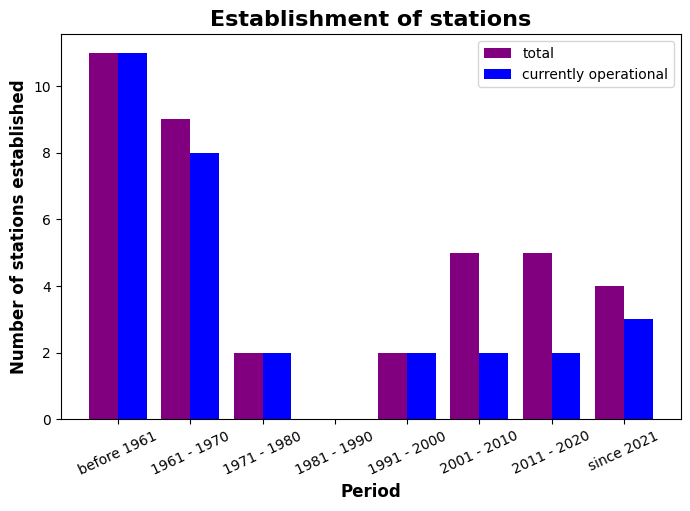

In [49]:
#### Extended barplot: station establishment & today's reporting status ####


stations_n = []
stations_operational = []
start_d = ["1951-01-01", "1961-01-01", "1971-01-01", "1981-01-01", "1991-01-01", "2001-01-01", "2011-01-01", "2021-01-01", "2031-01-01"]

for i, decade in enumerate(["before 1961", "1961 - 1970", "1971 - 1980", "1981 - 1990", "1991 - 2000", "2001 - 2010", "2011 - 2020", "since 2021"]):

    df = pd.DataFrame(data["stations"])
    # print(df)

    if i == 0:
        df = df[(df["dateEstablished"] < start_d[i])]
        stations_n.append(len(df))
        stations_operational.append(len(df[(df["reportingStatus"]=="operational")]))
    else:
        df = df[(df["dateEstablished"] >= start_d[i]) & (df["dateEstablished"] < start_d[i+1])]
        stations_n.append(len(df))
        stations_operational.append(len(df[(df["reportingStatus"]=="operational")]))

print(stations_n)
print(stations_operational)

# print(stations_n)
plt.style.use('default')
fig, axes = plt.subplots(1,1, figsize=(8,5))

decades = ["before 1961", "1961 - 1970", "1971 - 1980", "1981 - 1990", "1991 - 2000", "2001 - 2010", "2011 - 2020", "since 2021"]
n = len(decades)
r = np.arange(n) 
width = 0.4
plt.bar(r, stations_n, width=width, label= "total", color="purple")
plt.bar(r + width, stations_operational, width=width, label="currently operational", color="blue")

# plt.hlines(y = (20, 40, 60, 80, 100), xmin=0, xmax=7.5, colors="k", ls="--")
plt.xlabel("Period", fontsize=12, fontweight="bold")
plt.ylabel("Number of stations established", fontsize=12, fontweight="bold")
plt.title("Establishment of stations", fontsize=16, fontweight="bold")
plt.xticks(r + width/2,decades, rotation=25) 
plt.legend() 

plt.savefig(os.getcwd()+"/Plots/Station_establishment_barplot.jpeg", bbox_inches='tight')

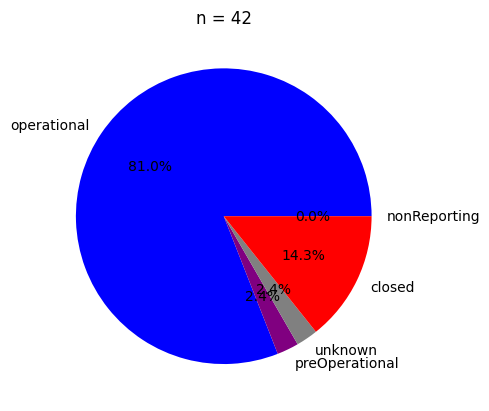

In [50]:
#### Pie chart: today's reporting status ####

df = pd.DataFrame(data["stations"])

status = ['operational', 'preOperational', 'unknown', 'closed', 'nonReporting']
status_n = []

for stat in status:
    status_n.append(len(df[df["reportingStatus"]==stat]))

colors = ['blue', 'purple', 'grey', 'red', 'orange']

fig, ax = plt.subplots()
ax.pie(status_n, labels=status, colors=colors,  autopct='%1.1f%%')
plt.title("n = " + str(len(df)))

plt.savefig(os.getcwd()+"/Plots/Station_ReportingStatus_piechart.jpeg", bbox_inches='tight')


In [51]:
# find all variables measured at a station in the past (unique)
df = pd.DataFrame(data["stations"])
df["observedProperties_unique"] = range(0,len(df))
pd.options.mode.chained_assignment = None

from functools import reduce
 
def unique(list1):
 
    # Print directly by using * symbol
    ans = reduce(lambda re, x: re+[x] if x not in re else re, list1, [])
    return(ans)

for i in range(0,len(df)):
    unique_codes = unique(df["observedProperties"][i])
    # print(unique_codes)
    df["observedProperties_unique"][i] = unique_codes

# print(df["observedProperties_unique"])

In [52]:
df_count = pd.Series(sum([item for item in df.observedProperties_unique], [])).value_counts()
df_count = pd.DataFrame(df_count)

df_count.index.name = 'variables'
df_count.reset_index(inplace=True)

print(df_count)

   variables  count
0        251     34
1        216     34
2        224     34
3      12005     34
4      12006     34
5        210     28
6        230     28
7        550     27
8        531     27
9        265     27
10       266     26
11       179     26
12       270     22
13       510     22
14       573      4
15       596      4
16        94      4
17        91      4
18        18      4
19       192      3
20       194      3
21       527      2
22       227      2
23       264      2
24       310      2
25       256      2
26     12000      2
27       445      1
28        37      1
29       225      1
30       325      1
31       263      1
32     12162      1
33       502      1
34       501      1
35       499      1
36       497      1
37       437      1
38       248      1
39       318      1
40       571      1
41       262      1
42       205      1
43       203      1
44       201      1
45       196      1
46       195      1
47       284      1


In [58]:
# combine 3 dictionaries (Atmosphere, Ocean & Terrestrial)

with open(os.getcwd()+"/WMDR_dictionaries/T_GO_VARIABLE_REF_dictionary.json") as f:
    dictionary = json.loads(f.read())

print(dictionary)

{'label': 'notation', 'Crustal motion (horizontal and vertical)': '6', 'Crustal plates positioning': '7', 'Earth Rotation': '8', 'Geoid': '9', 'Geomagnetic field': '10', 'Gravity field': '11', 'Gravity gradients': '12', 'Bathymetry': '13', 'Pressure': '18', 'Aerological soundings': '37', 'Atmospheric density': '39', 'Integrated air samples': '44', 'Special phenomena': '56', 'State of ground': '57', 'Ocean current direction': '62', 'Ocean current speed': '63', 'Ocean dynamic topography (ODT)': '64', 'Surface currents': '65', 'Dissolved inorganic carbon (DIC)': '67', 'Dissolved organic carbon': '68', 'Dissolved organic nitrogen': '69', 'Diffuse attenuation coefficient (DAC), turbidity': '70', 'Chlorophyll a concentration': '71', 'Ocean suspended sediments concentration': '72', 'Oil spill cover': '73', 'Primary production': '74', 'Sea surface mass flux': '75', 'Ocean Surface heat flux': '76', 'Sea surface height anomaly (SSHA)': '77', 'Total alkalinity (TA)': '78', 'pH': '79', 'SiO3= (met

In [59]:
#### find variable names instead of notations

# df = pd.DataFrame(data["stations"])

variables = df_count["variables"]
# print(variables)
print(type(df_count["variables"]))

df_count["variables_names"] = [(list(dictionary.keys())[list(dictionary.values()).index(var)]) for var in variables]
print(df_count)

<class 'pandas.core.series.Series'>
   variables  count                                    variables_names
0        251     34  Humidity  (at specified distance from referenc...
1        216     34                               Atmospheric pressure
2        224     34  Air temperature (at specified distance from re...
3      12005     34  Horizontal wind direction at specified distanc...
4      12006     34  Horizontal wind speed at specified distance fr...
5        210     28                            Amount of precipitation
6        230     28                                         Visibility
7        550     27                                      Type of cloud
8        531     27                               Height of cloud base
9        265     27                                       Past weather
10       266     26                                    Present weather
11       179     26                                       Cloud amount
12       270     22                      

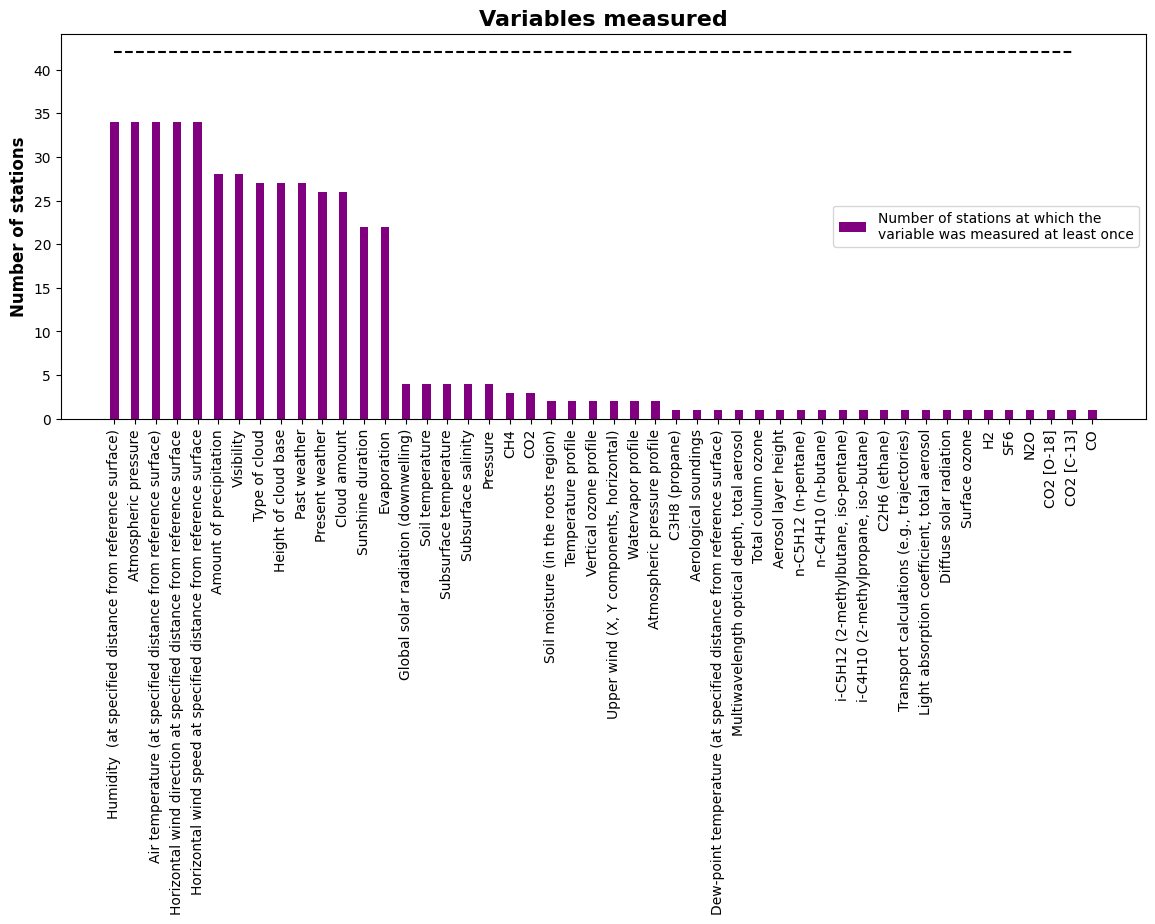

In [60]:
plt.style.use('default')
fig, axes = plt.subplots(1,1, figsize=(14,5))

plt.bar(df_count["variables_names"], df_count["count"], width=0.4, color="purple", label="Number of stations at which the\nvariable was measured at least once")
plt.hlines(y = len(df), xmin=0, xmax=46, colors="k", ls="--")
# t = plt.text(42, 150, "Total stations", fontsize=10)
t.set_bbox(dict(facecolor='white', alpha=1, edgecolor='white'))
plt.xticks(rotation=90)
plt.legend(loc="center right", fontsize=10, scatterpoints=10)
# plt.xlabel("Variables", fontsize=12, fontweight="bold")
plt.ylabel("Number of stations", fontsize=12, fontweight="bold")
plt.title("Variables measured", fontsize=16, fontweight="bold")

plt.savefig(os.getcwd()+"/Plots/MeasuredVariables_Overview.jpeg", bbox_inches='tight')
